In [26]:
#unsupervised learning technique, called k-means clustering 
#input: unlabelled customer data 
#output: assign each data point to clusters 

In [27]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from kneed import KneeLocator 
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA  
from mpl_toolkits.mplot3d import Axes3D 

#reading the data frame 
df_initial_mall_data = pd.read_csv('Mall_Customers.csv')

In [28]:
#taking a look at the data frame 
df_initial_mall_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [29]:
#taking a look of the first few rows of the data frame 
df_initial_mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [30]:
#removing CustomerID as it doesn't provide us with any useful cluster information 
df_initial_mall_data.drop('CustomerID', axis = 1, inplace = True)

In [31]:
df_initial_mall_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [32]:
#standardizing all variables in the dataset to get them around the same scale. We will standardize these variables to follow a normal distribution with a mean of 0 and a standard deviation of 1.
col_names = ['Annual Income (k$)', 'Age', 'Spending Score (1-100)']
features = df_initial_mall_data[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features

,Annual Income (k$),Age,Spending Score (1-100)
0,-1.738999,-1.424569,-0.434801
1,-1.738999,-1.281035,1.195704
2,-1.700830,-1.352802,-1.715913
3,-1.700830,-1.137502,1.040418
4,-1.662660,-0.563369,-0.395980
...,...,...,...
195,2.268791,-0.276302,1.118061
196,2.497807,0.441365,-0.861839
197,2.497807,-0.491602,0.923953
198,2.917671,-0.491602,-1.250054


In [33]:
#One hot encoding: The variable ‘gender’ is categorical, and we need to transform this into a numeric variable. This means that we need to substitute numbers for each category. 
gender = df_initial_mall_data['Gender'] 
df_new_mall_data = scaled_features.join(gender)

df_new_mall_data = pd.get_dummies(df_new_mall_data, prefix = None, prefix_sep = '_', dummy_na = False, columns = None, sparse = False, drop_first = False, dtype = None)

df_new_mall_data = df_new_mall_data.drop(['Gender_Male'], axis = 1)
df_new_mall_data

,Annual Income (k$),Age,Spending Score (1-100),Gender_Female
0,-1.738999,-1.424569,-0.434801,0
1,-1.738999,-1.281035,1.195704,0
2,-1.700830,-1.352802,-1.715913,1
3,-1.700830,-1.137502,1.040418,1
4,-1.662660,-0.563369,-0.395980,1
...,...,...,...,...
195,2.268791,-0.276302,1.118061,1
196,2.497807,0.441365,-0.861839,1
197,2.497807,-0.491602,0.923953,0
198,2.917671,-0.491602,-1.250054,0


In [34]:
df_new_mall_data.head()

,Annual Income (k$),Age,Spending Score (1-100),Gender_Female
0,-1.738999,-1.424569,-0.434801,0
1,-1.738999,-1.281035,1.195704,0
2,-1.700830,-1.352802,-1.715913,1
3,-1.700830,-1.137502,1.040418,1
4,-1.662660,-0.563369,-0.395980,1


Text(0, 0.5, 'Inertia')

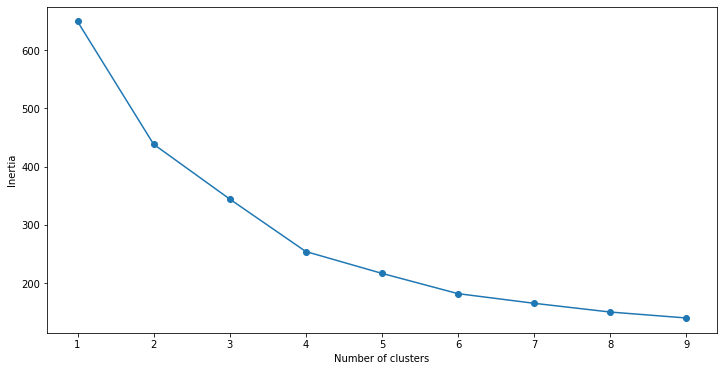

In [35]:
#Building a K-means clustering model and fitting it on all the variables in the dataset 
#Then, visualizing the performance of the clustering model in an elbow plot 
SSE = []

for cluster in range(1,10): 
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++') 
    kmeans.fit(df_new_mall_data)
    SSE.append(kmeans.inertia_)

#Converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia') 

In [36]:
#Based on the elbow plot above, we can see that the optimal number of clusters is 4. 

In [37]:
#A silhouette coefficient, or a silhouette score is a metric used to evaluate the quality of clusters created by the algorithm. 
#It also measures the distance between an object and the data points in the nearest cluster. The higher this distance, the better.
#A silhouette score closer to +1 indicates good clustering performance, and a silhouette score closer to -1 indicates a poor clustering model.

# First, building a model with 4 clusters
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
kmeans.fit(df_new_mall_data)

# Now, printing the silhouette score of this model
print(silhouette_score(df_new_mall_data, kmeans.labels_, metric = 'euclidean'))

0.35027020434653977


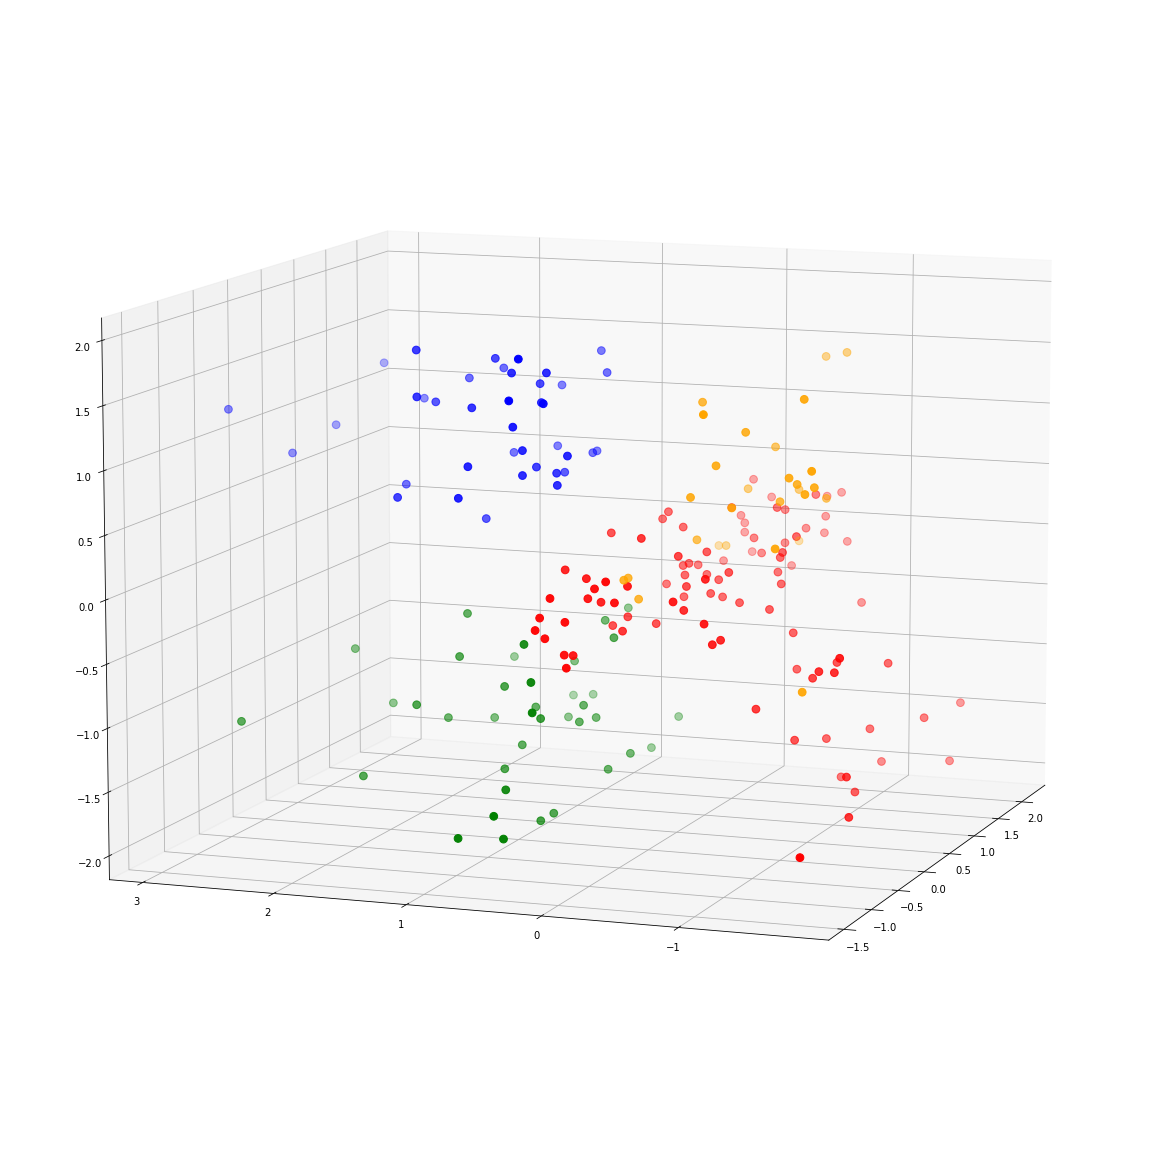

In [38]:
#Silhouette score of this model is about 0.35, which isn’t a bad model, but we can do better and try getting higher cluster separation.
#But before doing that, visualizing the clusters we just built to get an idea of how well the model is doing. 

clusters = kmeans.fit_predict(df_initial_mall_data.iloc[:,1:])
df_new_mall_data["label"] = clusters
 
fig = plt.figure(figsize=(21,21))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_new_mall_data.Age[df_new_mall_data.label == 0], df_new_mall_data["Annual Income (k$)"][df_new_mall_data.label == 0], df_new_mall_data["Spending Score (1-100)"][df_new_mall_data.label == 0], c='blue', s=60)

ax.scatter(df_new_mall_data.Age[df_new_mall_data.label == 1], df_new_mall_data["Annual Income (k$)"][df_new_mall_data.label == 1], df_new_mall_data["Spending Score (1-100)"][df_new_mall_data.label == 1], c='red', s=60)
ax.scatter(df_new_mall_data.Age[df_new_mall_data.label == 2], df_new_mall_data["Annual Income (k$)"][df_new_mall_data.label == 2], df_new_mall_data["Spending Score (1-100)"][df_new_mall_data.label == 2], c='green', s=60)
ax.scatter(df_new_mall_data.Age[df_new_mall_data.label == 3], df_new_mall_data["Annual Income (k$)"][df_new_mall_data.label == 3], df_new_mall_data["Spending Score (1-100)"][df_new_mall_data.label == 3], c='orange', s=60)

ax.view_init(10, 200)
plt.show()

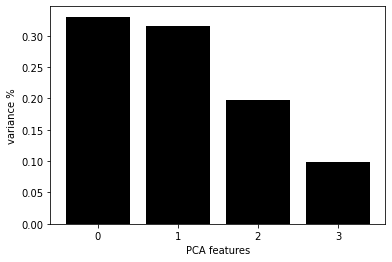

In [39]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(df_new_mall_data)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

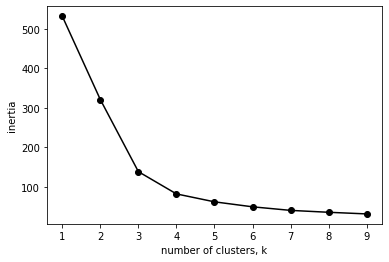

In [40]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:2])
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [41]:
model = KMeans(n_clusters=4)
model.fit(PCA_components.iloc[:,:2])

# silhouette score
print(silhouette_score(PCA_components.iloc[:,:2], model.labels_, metric='euclidean'))

0.519272987185085


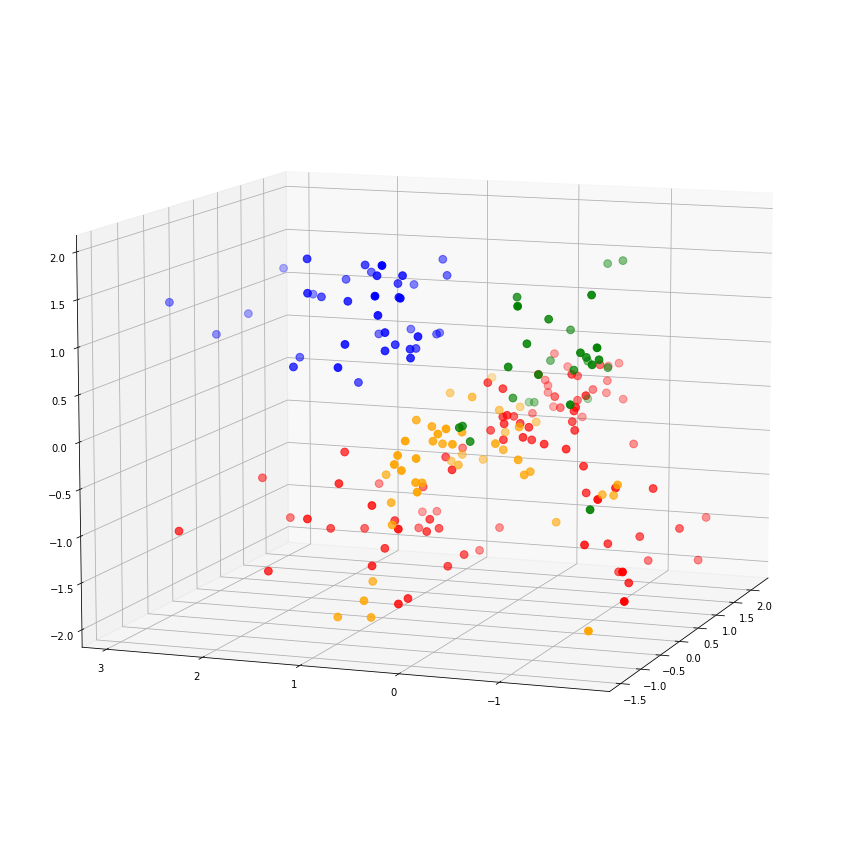

In [42]:
model = KMeans(n_clusters=4)

clusters = model.fit_predict(PCA_components.iloc[:,:2])
df_new_mall_data["label"] = clusters
 
fig = plt.figure(figsize=(15,40))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_new_mall_data.Age[df_new_mall_data.label == 0], df_new_mall_data["Annual Income (k$)"][df_new_mall_data.label == 0], df_new_mall_data["Spending Score (1-100)"][df_new_mall_data.label == 0], c='blue', s=60)
ax.scatter(df_new_mall_data.Age[df_new_mall_data.label == 1], df_new_mall_data["Annual Income (k$)"][df_new_mall_data.label == 1], df_new_mall_data["Spending Score (1-100)"][df_new_mall_data.label == 1], c='red', s=60)
ax.scatter(df_new_mall_data.Age[df_new_mall_data.label == 2], df_new_mall_data["Annual Income (k$)"][df_new_mall_data.label == 2], df_new_mall_data["Spending Score (1-100)"][df_new_mall_data.label == 2], c='green', s=60)

ax.scatter(df_new_mall_data.Age[df_new_mall_data.label == 3], df_new_mall_data["Annual Income (k$)"][df_new_mall_data.label == 3], df_new_mall_data["Spending Score (1-100)"][df_new_mall_data.label == 3], c='orange', s=60)

ax.view_init(10, 200)
plt.show()

In [43]:
df = pd.read_csv('Mall_Customers.csv')
df = df.drop(['CustomerID'],axis=1)

# map back clusters to dataframe

pred = model.predict(PCA_components.iloc[:,:2])
frame = pd.DataFrame(df)
frame['cluster'] = pred
frame.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,3
3,Female,23,16,77,2
4,Female,31,17,40,3


In [44]:
avg_df = df.groupby(['cluster'], as_index=False).mean()
avg_df

,cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,32.692308,86.538462,82.128205
1,1,51.329545,61.545455,32.375000
2,2,24.821429,28.714286,74.250000
3,3,28.511111,55.933333,42.422222


<AxesSubplot:xlabel='cluster', ylabel='Age'>

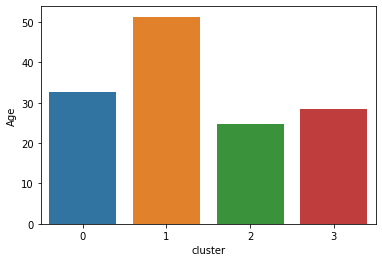

In [45]:
sns.barplot(x='cluster',y='Age',data=avg_df)

<AxesSubplot:xlabel='cluster', ylabel='Spending Score (1-100)'>

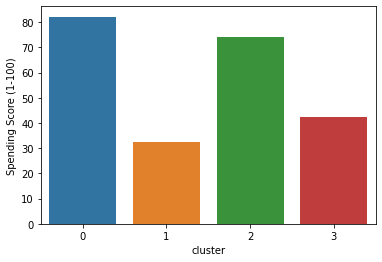

In [46]:
sns.barplot(x='cluster',y='Spending Score (1-100)',data=avg_df)

<AxesSubplot:xlabel='cluster', ylabel='Annual Income (k$)'>

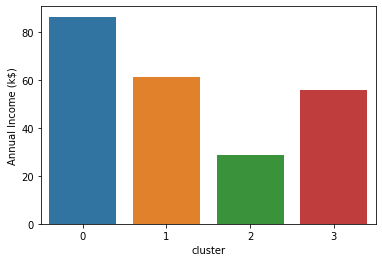

In [47]:
sns.barplot(x='cluster',y='Annual Income (k$)',data=avg_df)

In [48]:
df2 = pd.DataFrame(df.groupby(['cluster','Gender'])['Gender'].count())
df2.head()

Gender
cluster Gender        
0       Female      21
        Male        18
1       Female      46
        Male        42
2       Female      14

In [49]:
#Cluster 0: The frugal spender
#Cluster 1: Almost retired
#Cluster 2: The careless buyer
#Cluster 3: Highly affluent individuals